 # Module 2: Time Series Characterization

-   Basic Metrics
-   Kurtosis and Skewness
-   Outliers Detection Revisited
-   AIC and BIC Tests
-   Random Walks

## Basic Metrics

Time series analysis often begins with calculating basic statistical
measures to understand the central tendency, dispersion, and range of
the data. Let’s explore these metrics:

1.  **Mean**: The average value of the series.  
  Formula: $\bar{x}=\frac{1}{n}\sum_{i=1}^nx_i$

2.  **Variance**: A measure of variability that quantifies the average squared deviation from the mean.  
  Formula: $\sigma^2=\frac{1}{n-1}\sum_{i=1}^n(x_i-\bar{x})^2$

3.  **Standard Deviation**: The square root of the variance, providing a measure of dispersion in the same units as the original data.  
  Formula: $\sigma =\sqrt{\frac{1}{n-1}\sum_{i=1}^n(x_i-\bar{x})^2}$

4.  **Maximum**: The highest value in the series.

5.  **Minimum**: The lowest value in the series.

These basic metrics provide a foundation for understanding the characteristics of time series data. The mean gives us the central tendency, while the variance and standard deviation indicate the spread of the data. The maximum and minimum values show the range of the series. In the next sections, we’ll explore more advanced statistical measures and techniques for characterizing time series data.
Let’s calculate these metrics for our simulated sensor data.


Mean: 50.69
Variance: 854.74
Standard Deviation: 29.24
Maximum: 136.22
Minimum: -18.61


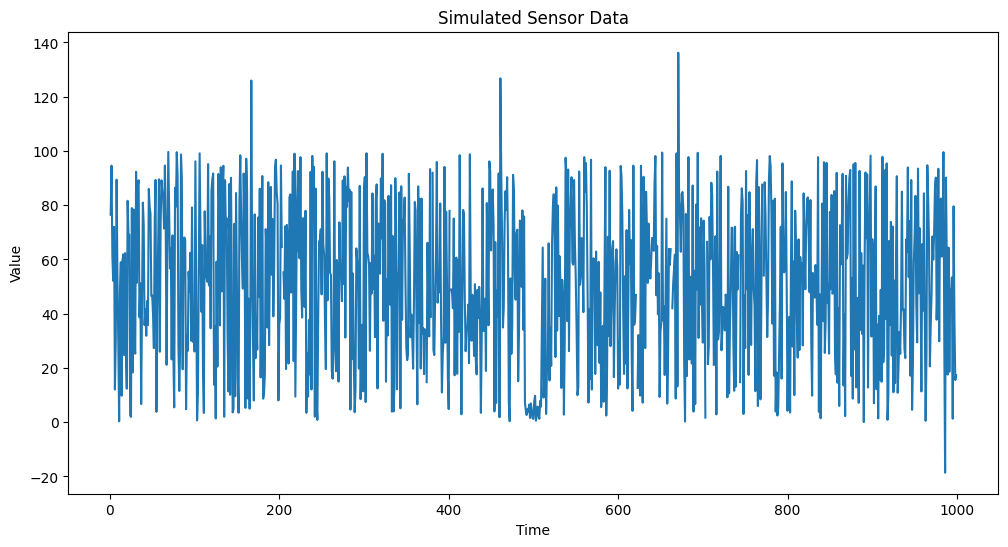

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Re-create the simulated sensor data
def simulate_sensor_data(num_points=1000, min_val=0, max_val=100, missing_pct=0.01, noisy_pct=0.01, faulty_pct=0.02):
    data = np.random.uniform(min_val, max_val, num_points)
    missing_indices = np.random.choice(num_points, int(num_points * missing_pct), replace=False)
    data[missing_indices] = np.nan
    noisy_indices = np.random.choice(num_points, int(num_points * noisy_pct), replace=False)
    data[noisy_indices] = np.random.uniform(min_val - 50, max_val + 50, len(noisy_indices))
    faulty_start = int(num_points * (1 - faulty_pct) / 2)
    faulty_end = int(num_points * (1 + faulty_pct) / 2)
    data[faulty_start:faulty_end] = np.random.uniform(min_val, (max_val-min_val)/10 , faulty_end-faulty_start)
    return data

# Generate the simulated data
simulated_data = simulate_sensor_data()

# Remove nan values
simulated_data_clean = simulated_data[~np.isnan(simulated_data)]

# Calculate basic metrics
mean_value = np.mean(simulated_data_clean)
variance = np.var(simulated_data_clean)
std_dev = np.std(simulated_data_clean)
max_value = np.max(simulated_data_clean)
min_value = np.min(simulated_data_clean)

print(f"Mean: {mean_value:.2f}")
print(f"Variance: {variance:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Maximum: {max_value:.2f}")
print(f"Minimum: {min_value:.2f}")

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(simulated_data)
plt.title("Simulated Sensor Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()


## Kurtosis and Skewness

Kurtosis and skewness are important statistical measures that provide
insights into the shape and characteristics of a probability
distribution.

## Skewness

Skewness measures the asymmetry of a distribution. It indicates whether
the data is skewed to the left, right, or symmetrically distributed
around the mean.

**Interpretation:**

-   Skewness = 0: Symmetric distribution

-   Skewness \> 0: Right-skewed (positive skew)

-   Skewness \< 0: Left-skewed (negative skew)

**Formula:**  
For a sample, the skewness is calculated as:

$$\text{Skewness}=\frac{n}{(n-1)(n-2)}\sum_{i=1}^n\left(\frac{x_i-\bar{x}}{s}\right)^3$$

Where n is the sample size, $\bar{x}$ is the sample mean, and s is the
sample standard deviation.

## Kurtosis

Kurtosis measures the “tailedness” of a distribution. It describes the
shape of a probability distribution’s tails in relation to its overall
shape.

**Interpretation:**

-   Kurtosis = 3: Mesokurtic (normal distribution)

-   Kurtosis \> 3: Leptokurtic (heavy-tailed)

-   Kurtosis \< 3: Platykurtic (light-tailed)

**Formula:**  
For a sample, the kurtosis is calculated as:

$$\text{Kurtosis}=\frac{n(n+1)}{(n-1)(n-2)(n-3)}\sum_{i=1}^n\left(\frac{x_i-\bar{x}}{s}\right)^4-\frac{3(n-1)^2}{(n-2)(n-3)}$$

Where n is the sample size, $\bar{x}$ is the sample mean, and s is the
sample standard deviation.

Now, let’s implement these measures in Python and examine different
cases:


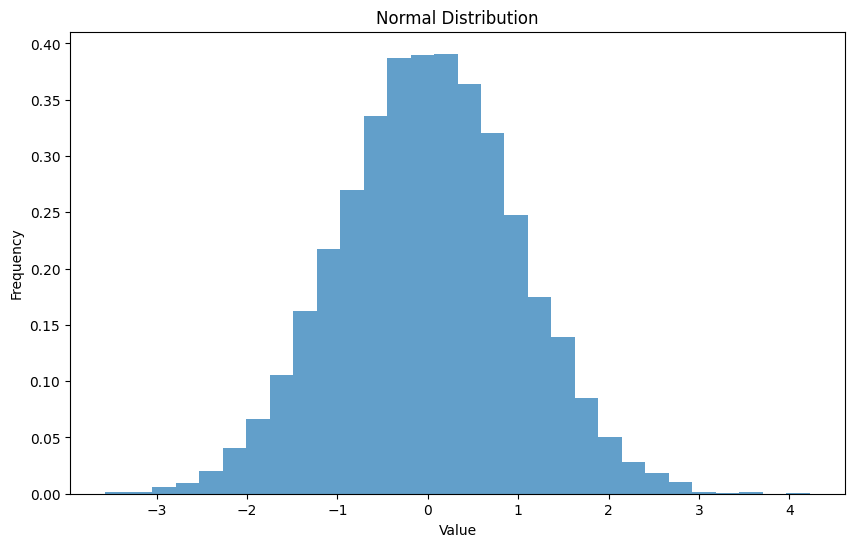

Normal Distribution:
Skewness: 0.0107
Kurtosis: -0.0068



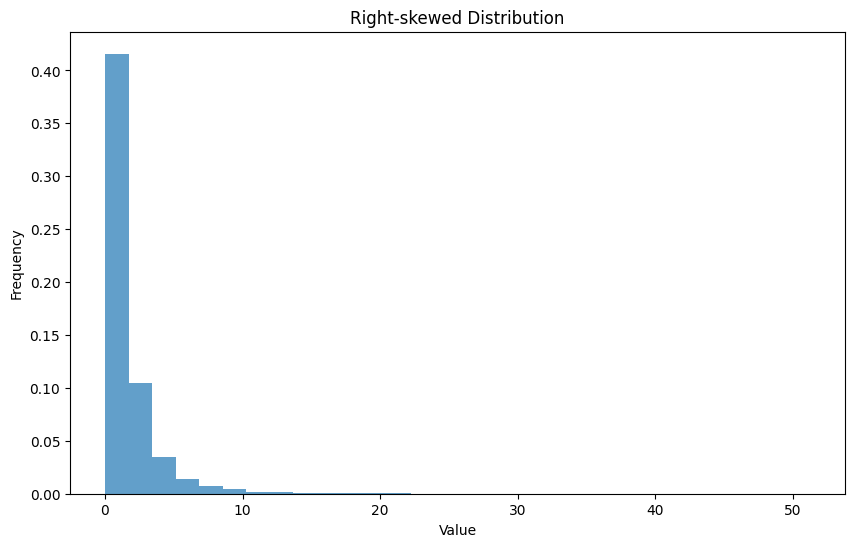

Right-skewed Distribution:
Skewness: 4.9012
Kurtosis: 50.3986



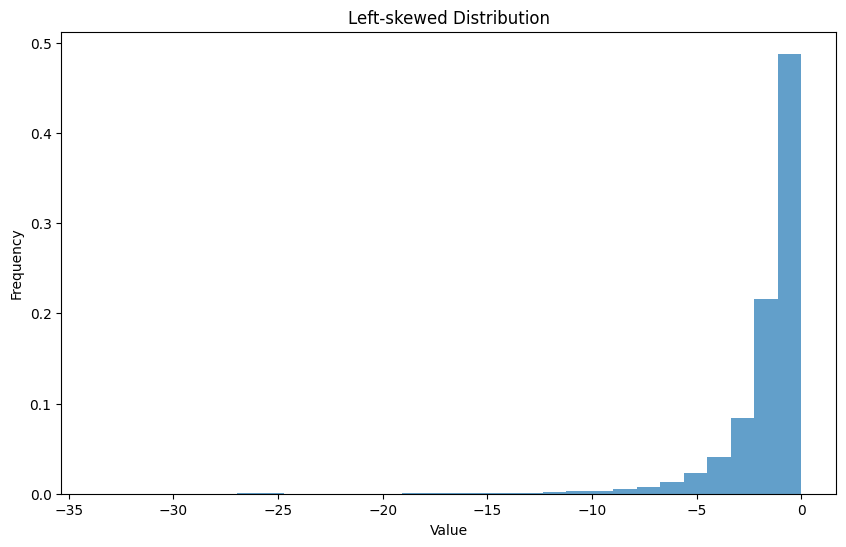

Left-skewed Distribution:
Skewness: -4.6394
Kurtosis: 36.3979



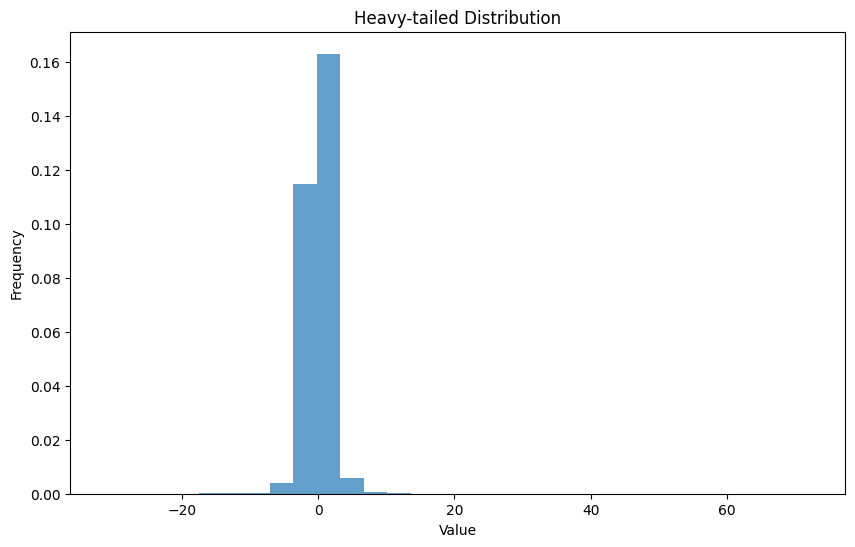

Heavy-tailed Distribution:
Skewness: 6.2935
Kurtosis: 234.0996



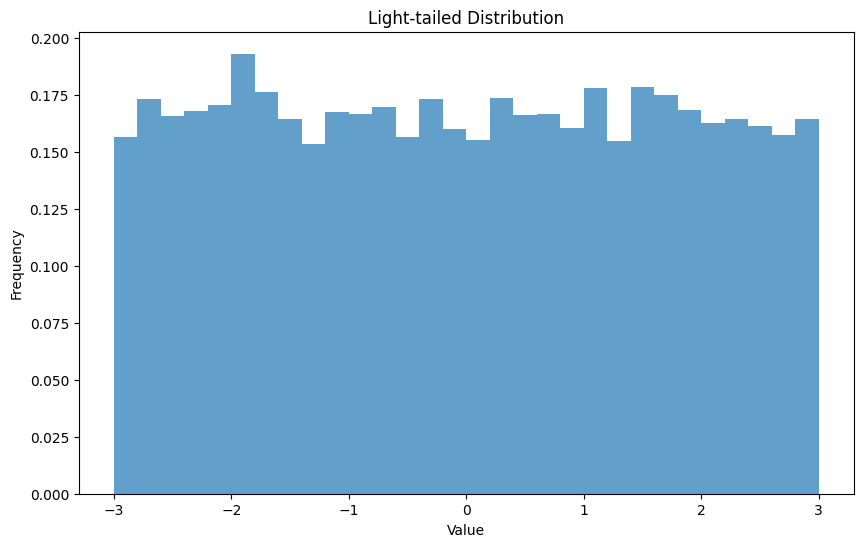

Light-tailed Distribution:
Skewness: 0.0084
Kurtosis: -1.2103


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def plot_distribution(data, title):
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=30, density=True, alpha=0.7)
    plt.title(title)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

# Case 1: Normal distribution (symmetric, mesokurtic)
normal_data = np.random.normal(0, 1, 10000)
plot_distribution(normal_data, "Normal Distribution")
print("Normal Distribution:")
print(f"Skewness: {stats.skew(normal_data):.4f}")
print(f"Kurtosis: {stats.kurtosis(normal_data):.4f}\n")

# Case 2: Right-skewed distribution
right_skewed = np.random.lognormal(0, 1, 10000)
plot_distribution(right_skewed, "Right-skewed Distribution")
print("Right-skewed Distribution:")
print(f"Skewness: {stats.skew(right_skewed):.4f}")
print(f"Kurtosis: {stats.kurtosis(right_skewed):.4f}\n")

# Case 3: Left-skewed distribution
left_skewed = -np.random.lognormal(0, 1, 10000)
plot_distribution(left_skewed, "Left-skewed Distribution")
print("Left-skewed Distribution:")
print(f"Skewness: {stats.skew(left_skewed):.4f}")
print(f"Kurtosis: {stats.kurtosis(left_skewed):.4f}\n")

# Case 4: Heavy-tailed distribution (leptokurtic)
heavy_tailed = np.random.standard_t(3, 10000)
plot_distribution(heavy_tailed, "Heavy-tailed Distribution")
print("Heavy-tailed Distribution:")
print(f"Skewness: {stats.skew(heavy_tailed):.4f}")
print(f"Kurtosis: {stats.kurtosis(heavy_tailed):.4f}\n")

# Case 5: Light-tailed distribution (platykurtic)
light_tailed = np.random.uniform(-3, 3, 10000)
plot_distribution(light_tailed, "Light-tailed Distribution")
print("Light-tailed Distribution:")
print(f"Skewness: {stats.skew(light_tailed):.4f}")
print(f"Kurtosis: {stats.kurtosis(light_tailed):.4f}")


This code generates and analyzes five different distributions:

1.  Normal distribution: Should have skewness close to 0 and kurtosis close to 0 (3 if not using excess kurtosis).

2.  Right-skewed distribution: Positive skewness, kurtosis \> 0.

3.  Left-skewed distribution: Negative skewness, kurtosis \> 0.

4.  Heavy-tailed distribution: Kurtosis \> 0, potentially high.

5.  Light-tailed distribution: Kurtosis \< 0.

Interpreting the results of the examples:

-   Skewness values further from 0 indicate more asymmetry.

-   Positive skewness suggests a longer right tail, negative skewness a
    longer left tail.

-   Kurtosis values greater than 0 (or 3 if not using excess kurtosis)
    indicate heavier tails than a normal distribution.

-   Kurtosis values less than 0 (or 3) indicate lighter tails than a
    normal distribution.

We can see that interpreting kurtosis and skewness in practical
scenarios is crucial for understanding the characteristics of your data
distribution.

### Interpretation

An important concept in interpretation of these metrics is of "heavy-tailing": A heavy tailed distribution has a tail that’s heavier than an exponential distribution. In other words, a distribution that is heavy tailed goes to zero slower than one with exponential tails, tending to have many outliers with very high values. The heavier the tail, the larger the probability that you’ll get one or more disproportionate values in a sample. Said that, let's understand how to interpret Skewness and Kurtosis. <br><br>


#### Interpreting Skewness

Skewness indicates the asymmetry of the distribution. In practical
scenarios:

1.  **Positive Skewness (Right-skewed)**

    -   The tail of the distribution extends more towards the right.

    -   Mean \> Median \> Mode

    -   Examples:

        -   Income distributions: A few high earners pull the mean
            higher than the median.

        -   House prices: A small number of very expensive houses can
            skew the distribution.

2.  **Negative Skewness (Left-skewed)**

    -   The tail of the distribution extends more towards the left.

    -   Mean \< Median \< Mode

    -   Examples:

        -   Age at death in developed countries: Most people live to old
            age, with fewer early deaths.

        -   Test scores with a ceiling effect: When many students score
            near the maximum possible score.

3.  **Approximately Symmetric (Skewness close to 0)**

    -   The distribution is roughly symmetrical around the mean.

    -   Mean ≈ Median ≈ Mode

    -   Examples:

        -   Height distributions in a population.

        -   IQ scores (designed to be normally distributed).

### Interpreting Kurtosis

Kurtosis measures the tailedness of the distribution. In practical
scenarios:

1.  **High Kurtosis (Leptokurtic)**

    -   Heavy tails, more outliers.

    -   A sharper peak around the mean.

    -   Examples:

        -   Financial returns: Stock markets often exhibit extreme
            events more frequently than a normal distribution would
            predict.

        -   Reaction time data: Often has a sharp peak with some very
            slow reactions.

2.  **Low Kurtosis (Platykurtic)**

    -   Light tails, fewer outliers.

    -   A flatter peak around the mean.

    -   Examples:

        -   Uniform distributions: Like rolling a fair die.

        -   Bimodal distributions: Such as the distribution of heights
            in a mixed-gender population.

3.  **Mesokurtic (Kurtosis ≈ 3 or excess kurtosis ≈ 0)**

    -   Similar to a normal distribution.

    -   Examples:

        -   Many natural phenomena approximately follow this
            distribution.

## Practical Applications

1.  **Financial Risk Management**

    -   High positive skewness in returns might indicate potential for
        large gains.

    -   High kurtosis suggests a higher risk of extreme events (both
        positive and negative).

2.  **Quality Control**

    -   Negative skewness in product measurements might indicate a
        process consistently producing near the upper specification
        limit.

    -   High kurtosis could suggest occasional defective products
        (outliers).

3.  **Environmental Science**

    -   Positive skewness in pollution levels might indicate occasional
        high pollution events.

    -   Low kurtosis in rainfall data might suggest consistent,
        predictable precipitation patterns.

4.  **Healthcare**

    -   Positive skewness in patient wait times could indicate a few
        cases requiring exceptionally long waits.

    -   High kurtosis in drug response data might suggest that the drug
        has varied effects across the population.

5.  **Education**

    -   Negative skewness in test scores might indicate that the test
        was too easy for the group.

    -   Low kurtosis in student performance might suggest a wide range
        of abilities in the class.

To illustrate these concepts with our simulated sensor data:

Skewness of simulated sensor data: -0.0126
Kurtosis of simulated sensor data: -1.0718


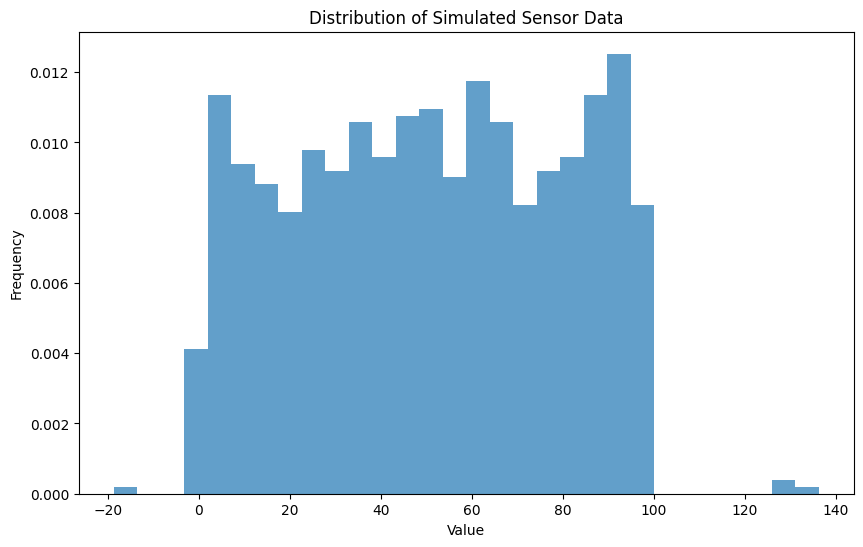

In [ ]:
# Calculate skewness and kurtosis for our simulated sensor data
skewness = stats.skew(simulated_data_clean)
kurtosis = stats.kurtosis(simulated_data_clean)

print(f"Skewness of simulated sensor data: {skewness:.4f}")
print(f"Kurtosis of simulated sensor data: {kurtosis:.4f}")

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(simulated_data, bins=30, density=True, alpha=0.7)
plt.title("Distribution of Simulated Sensor Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


Interpreting these results for our simulated sensor data would involve
considering the nature of the sensor and what the measurements
represent. For example:

-   If the skewness is significantly positive, it might indicate
    occasional high readings, perhaps due to sensor malfunctions or rare
    environmental events.

-   If the kurtosis is high, it could suggest that the sensor
    occasionally produces extreme values, which might warrant
    investigation into the cause of these outliers.

Understanding these measures helps in identifying unusual patterns,
potential data quality issues, or important characteristics of the
system being measured, which can guide further analysis and
decision-making processes.

### Kurtosis and Skewness X Potential issues in data quality

Kurtosis and skewness can indeed be valuable indicators of potential
data quality issues. These statistical measures can reveal anomalies or
unexpected patterns in your data that might warrant further
investigation.

## Skewness as an Indicator of Data Quality Issues

1.  **Unexpected Asymmetry**

    -   If you expect your data to be normally distributed but observe
        significant skewness, it could indicate data quality problems.

    -   For example, if sensor readings that should be symmetrical show
        strong positive skewness, it might suggest calibration issues or
        systematic errors in data collection.

2.  **Outliers and Data Entry Errors**

    -   Extreme skewness can be a sign of outliers or data entry errors.

    -   A long tail in either direction might contain erroneous values
        that need to be checked and potentially corrected or removed.

3.  **Truncation or Censoring**

    -   If data is truncated (cut off at a certain point) or censored
        (values beyond a threshold are not recorded), it can lead to
        skewness.

    -   This might indicate limitations in the measurement process or
        data collection method.

## Kurtosis as an Indicator of Data Quality Issues

1.  **Unexpected Peaks or Flatness**

    -   Very high kurtosis (leptokurtic) might indicate the presence of
        outliers or data spikes that could be erroneous.

    -   Very low kurtosis (platykurtic) in a dataset expected to have a
        normal distribution might suggest data compression or rounding
        issues.

2.  **Bimodality or Multimodality**

    -   Kurtosis significantly lower than expected might indicate a
        bimodal or multimodal distribution, which could suggest mixed
        populations or systematic errors in data collection.

3.  **Data Contamination**

    -   Unusually high kurtosis can be a sign of data contamination,
        where a small number of extreme values have been introduced into
        the dataset.

Let’s demonstrate how we might use these measures to identify potential
data quality issues in our simulated sensor data:


Skewness: 0.7281
Kurtosis: 31.6750


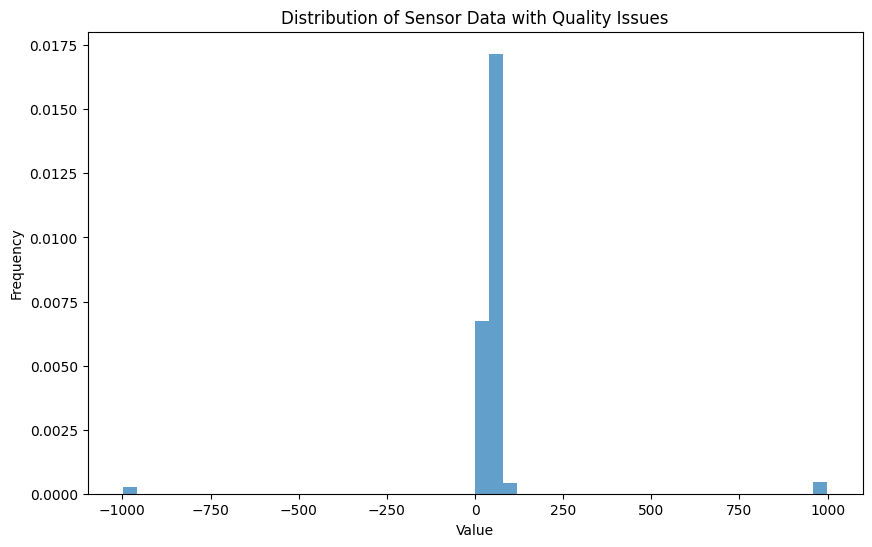

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Function to simulate sensor data with intentional quality issues
def simulate_sensor_data_with_issues(num_points=1000, min_val=0, max_val=100, error_rate=0.05):
    data = np.random.normal(50, 15, num_points)

    # Introduce some data quality issues
    error_indices = np.random.choice(num_points, int(num_points * error_rate), replace=False)
    data[error_indices] = np.random.choice([np.nan, -999, 999], size=len(error_indices))

    return data

# Generate data with issues
data_with_issues = simulate_sensor_data_with_issues()

# Calculate skewness and kurtosis
skewness = stats.skew(data_with_issues, nan_policy='omit')
kurtosis = stats.kurtosis(data_with_issues, nan_policy='omit')

print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(data_with_issues, bins=50, density=True, alpha=0.7)
plt.title("Distribution of Sensor Data with Quality Issues")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


In this example, we’ve intentionally introduced data quality issues such
as missing values (NaN) and extreme outliers (-999 and 999). Here’s how
to interpret the results:

1.  **Skewness**: A significant non-zero value might indicate asymmetry
    caused by the introduced errors.

2.  **Kurtosis**: A high positive value suggests heavy tails, likely due
    to the extreme outliers we introduced.

3.  **Histogram**: Look for unexpected peaks or long tails that might
    represent data quality issues.

4.  **Outlier Detection**: The code identifies potential outliers using
    the Interquartile Range (IQR) method. A large number of outliers or
    extreme values could indicate data quality problems.

When you observe unexpected skewness or kurtosis in your data:

1.  Investigate the source of asymmetry or heavy tails.

2.  Check for data entry errors, sensor malfunctions, or processing
    issues.

3.  Consider the impact of outliers and whether they represent genuine
    extreme events or data errors.

4.  Examine your data collection and processing pipeline for potential
    sources of bias or error.

Remember, while kurtosis and skewness can indicate potential issues,
they should be used in conjunction with other data quality checks and
domain knowledge to make informed decisions about data integrity and
necessary cleaning steps.

## Outliers Detection Revisited

Outlier detection is crucial in data analysis as outliers can
significantly impact statistical analyses and machine learning models.

### Basic Concept: Quartiles

Quartiles are important statistical measures used to divide a dataset
into four equal parts. They provide valuable information about the
distribution of data and are particularly useful for identifying
outliers and understanding the spread of values. Let’s explore the
concept of quartiles in more detail:

## Definition and Calculation

Quartiles divide a dataset into four equal parts, each containing 25% of
the data:

1.  First Quartile (Q1): The median of the lower half of the dataset

2.  Second Quartile (Q2): The median of the entire dataset

3.  Third Quartile (Q3): The median of the upper half of the dataset

The calculation of quartiles can be done using the following steps:

1.  Sort the dataset in ascending order

2.  Find the median (Q2) of the entire dataset

3.  Calculate Q1 as the median of the lower half of the data

4.  Calculate Q3 as the median of the upper half of the data

## Visualization

Quartiles are often visualized using box plots (also known as
box-and-whisker plots). These plots provide a graphical representation
of the dataset’s distribution, showing:

-   The minimum and maximum values (whiskers)

-   The first and third quartiles (edges of the box)

-   The median (line inside the box)

-   Potential outliers (individual points beyond the whiskers)

## Applications

Quartiles have various applications in data analysis and statistics:

1.  Summarizing data distribution

2.  Comparing multiple datasets

3.  Identifying skewness in data

4.  Detecting outliers

5.  Providing input for further statistical analyses

#### Quartiles X Percentiles

Quartiles and percentiles are both measures used to divide a dataset
into segments, but they differ in their granularity and specific
applications. Let’s explore the key differences between these two
concepts:

## Definition

**Quartiles:**

-   Divide the dataset into four equal parts (quarters).

-   There are three quartile points: Q1 (25th percentile), Q2 (50th
    percentile or median), and Q3 (75th percentile).

**Percentiles:**

-   Divide the dataset into 100 equal parts.

-   There are 99 percentile points, ranging from the 1st to the 99th
    percentile.

## Granularity

**Quartiles:**

-   Provide a coarser division of the data (4 parts).

-   Useful for quick, broad insights into data distribution.

**Percentiles:**

-   Offer a much finer division of the data (100 parts).

-   Allow for more precise positioning of data points within the
    distribution.

## Calculation

**Quartiles:**

-   Q1 is the 25th percentile

-   Q2 (median) is the 50th percentile

-   Q3 is the 75th percentile

**Percentiles:**

-   Can be any value from 1 to 99

-   The 50th percentile is equivalent to the median (Q2)

## Applications

**Quartiles:**

-   Commonly used in box plots to visualize data distribution

-   Used to calculate the Interquartile Range (IQR) for outlier
    detection

-   Provide a quick summary of data spread and central tendency

**Percentiles:**

-   Used in standardized testing (e.g., “scoring in the 90th
    percentile”)

-   Applied in growth charts (e.g., child height/weight percentiles)

-   Useful for setting thresholds or benchmarks in various fields

## Example

Let’s illustrate the difference with a Python example:


Quartiles: Q1=90.29, Q2=100.38, Q3=109.72
Selected Percentiles: P10=81.33, P90=119.58, P95=125.15


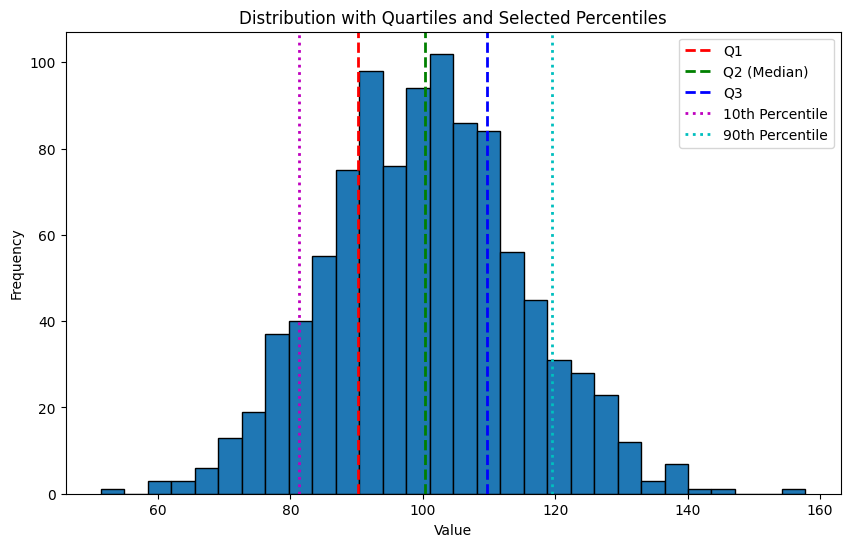

In [8]:

import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
data = np.random.normal(100, 15, 1000)

# Calculate quartiles
Q1, Q2, Q3 = np.percentile(data, [25, 50, 75])

# Calculate some percentiles
P10, P90, P95 = np.percentile(data, [10, 90, 95])

print(f"Quartiles: Q1={Q1:.2f}, Q2={Q2:.2f}, Q3={Q3:.2f}")
print(f"Selected Percentiles: P10={P10:.2f}, P90={P90:.2f}, P95={P95:.2f}")

# Visualize
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, edgecolor='black')
plt.axvline(Q1, color='r', linestyle='dashed', linewidth=2, label='Q1')
plt.axvline(Q2, color='g', linestyle='dashed', linewidth=2, label='Q2 (Median)')
plt.axvline(Q3, color='b', linestyle='dashed', linewidth=2, label='Q3')
plt.axvline(P10, color='m', linestyle='dotted', linewidth=2, label='10th Percentile')
plt.axvline(P90, color='c', linestyle='dotted', linewidth=2, label='90th Percentile')
plt.legend()
plt.title('Distribution with Quartiles and Selected Percentiles')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


This example demonstrates how quartiles provide a broader division of the data, while percentiles offer more granular insights. The visualization helps to see how these measures relate to the overall distribution of the data. In summary, while quartiles and percentiles are related concepts, they differ in their level of detail and specific use cases. Quartiles are more commonly used for general data summarization and visualization, while percentiles offer more precise positioning within a distribution, making them valuable for detailed analysis and benchmarking.

### Outlier Detection Methods

## 1. Interquartile Range (IQR) Method

The IQR method is a robust technique for identifying outliers based on
the distribution of the data.

**Formula:**

-   IQR = Q3 - Q1

-   Lower Bound = Q1 - 1.5 \* IQR

-   Upper Bound = Q3 + 1.5 \* IQR

Where Q1 is the first quartile (25th percentile) and Q3 is the third quartile (75th percentile).


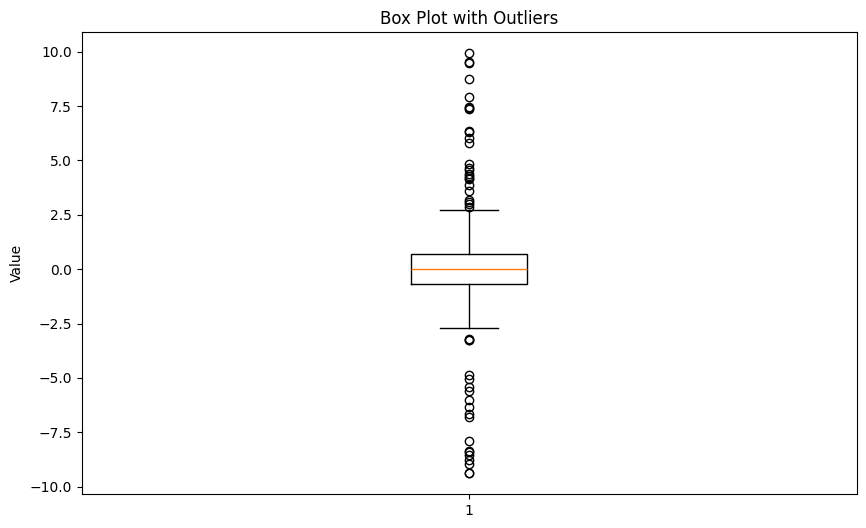

Number of outliers detected: 44
Lower bound: -2.72
Upper bound: 2.73


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def iqr_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers, lower_bound, upper_bound

# Generate sample data
np.random.seed(42)
data = np.concatenate([np.random.normal(0, 1, 1000), np.random.uniform(-10, 10, 50)])

outliers, lower_bound, upper_bound = iqr_outliers(data)

plt.figure(figsize=(10, 6))
plt.boxplot(data)
plt.title("Box Plot with Outliers")
plt.ylabel("Value")
plt.show()

print(f"Number of outliers detected: {len(outliers)}")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")



## 2. Z-Score Method

The Z-score method identifies outliers based on how many standard
deviations a data point is from the mean.

**Formula:**  
Z-score = (X - μ) / σ

Where X is the data point, μ is the mean, and σ is the standard
deviation.



In [10]:
from scipy import stats

def zscore_outliers(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    outliers = data[z_scores > threshold]
    return outliers

z_outliers = zscore_outliers(data)
print(f"Number of outliers detected (Z-score): {len(z_outliers)}")


Number of outliers detected (Z-score): 27


## 3. Modified Z-Score Method

This method is more robust to extreme values as it uses the median and
Median Absolute Deviation (MAD) instead of mean and standard deviation.

**Formula:**  
Modified Z-score = 0.6745 \* (X - median) / MAD

In [11]:

def modified_zscore_outliers(data, threshold=3.5):
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    modified_z_scores = 0.6745 * (data - median) / mad
    outliers = data[np.abs(modified_z_scores) > threshold]
    return outliers

mod_z_outliers = modified_zscore_outliers(data)
print(f"Number of outliers detected (Modified Z-score): {len(mod_z_outliers)}")


Number of outliers detected (Modified Z-score): 37


## 4. Tukey’s Method (Boxplot Method)

This method is similar to the IQR method but uses different multipliers for the whiskers.

In [12]:
def tukey_outliers(data, k=1.5):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

tukey_out = tukey_outliers(data)
print(f"Number of outliers detected (Tukey's method): {len(tukey_out)}")


Number of outliers detected (Tukey's method): 44


## 5. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN is a clustering algorithm that can be used for outlier detection.
It identifies outliers as points that are in low-density regions.


In [13]:
from sklearn.cluster import DBSCAN

def dbscan_outliers(data, eps=0.5, min_samples=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    outlier_labels = dbscan.fit_predict(data.reshape(-1, 1))
    outliers = data[outlier_labels == -1]
    return outliers

dbscan_out = dbscan_outliers(data)
print(f"Number of outliers detected (DBSCAN): {len(dbscan_out)}")


Number of outliers detected (DBSCAN): 23


## Comparison of Methods
Each method has its strengths and weaknesses:

-   IQR and Tukey’s method are robust to extreme values but may not work
    well for non-normal distributions.

-   Z-score is simple but assumes a normal distribution and is sensitive
    to extreme outliers.

-   Modified Z-score is more robust than the standard Z-score for
    non-normal distributions.

-   DBSCAN can detect outliers in multidimensional space and doesn’t
    assume any particular distribution, but it’s sensitive to parameter
    choices.

When dealing with time series data, consider:

1.  Using rolling windows to detect local outliers.

2.  Applying seasonal decomposition before outlier detection.

3.  Using domain-specific thresholds based on the nature of your data.

Remember, the choice of method depends on your data’s characteristics
and the specific requirements of your analysis. It’s often beneficial to
use multiple methods and compare their results.


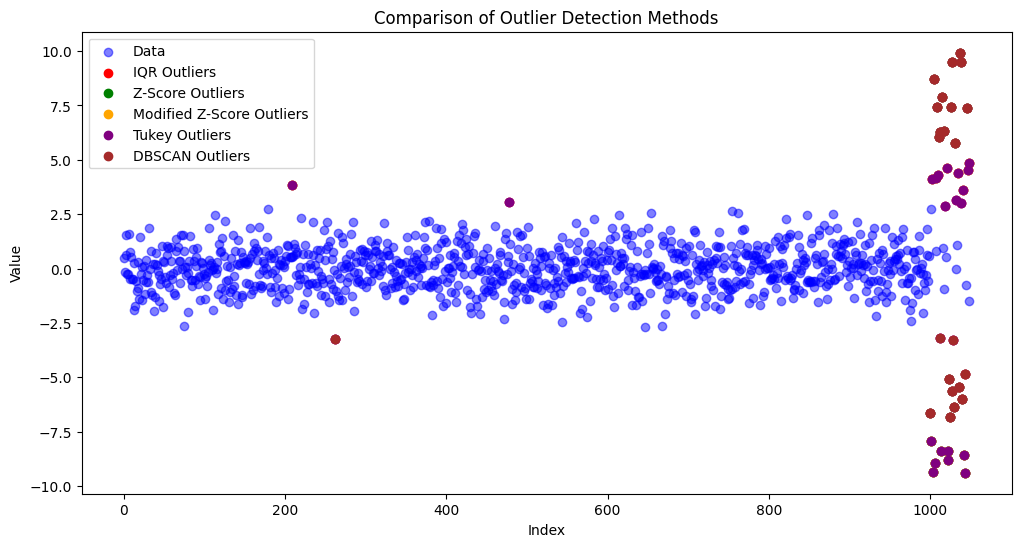

In [18]:
plt.figure(figsize=(12, 6))
plt.scatter(range(len(data)), data, c='blue', alpha=0.5, label='Data')
# Use the indices of the outliers in the original data for the x-axis
outlier_indices = np.where(np.isin(data, outliers))[0]  # Get indices of outliers
plt.scatter(outlier_indices, outliers, c='red', label='IQR Outliers')  # Plot outliers using their indices
# Get indices of z_outliers, mod_z_outliers, tukey_out, dbscan_out in original data
z_outlier_indices = np.where(np.isin(data, z_outliers))[0]
mod_z_outlier_indices = np.where(np.isin(data, mod_z_outliers))[0]
tukey_out_indices = np.where(np.isin(data, tukey_out))[0]
dbscan_out_indices = np.where(np.isin(data, dbscan_out))[0]
# Plot z_outliers, mod_z_outliers, tukey_out, dbscan_out using their indices
plt.scatter(z_outlier_indices, z_outliers, c='green', label='Z-Score Outliers')
plt.scatter(mod_z_outlier_indices, mod_z_outliers, c='orange', label='Modified Z-Score Outliers')
plt.scatter(tukey_out_indices, tukey_out, c='purple', label='Tukey Outliers')
plt.scatter(dbscan_out_indices, dbscan_out, c='brown', label='DBSCAN Outliers')

plt.legend()
plt.title('Comparison of Outlier Detection Methods')
plt.ylabel('Value')
plt.xlabel('Index')
plt.show()


## AIC and BIC Tests

Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) are important model selection criteria used in statistics and machine learning. They help in comparing different models and selecting the one that best balances goodness of fit with model complexity. Both AIC and BIC are particularly useful when dealing with time series data, including both continuous and discrete series.

## Akaike Information Criterion (AIC)

AIC is defined as:

$AIC=2k-2\ln(\hat{L})$

Where:

-   k is the number of parameters in the model

-   $\hat{L}$ is the maximum value of the likelihood function for the model

The AIC penalizes the addition of parameters to discourage overfitting.
The model with the lowest AIC is preferred.

## Bayesian Information Criterion (BIC)

BIC is defined as:

$BIC=\ln(n)k-2\ln(\hat{L})$

Where:

-   n is the number of observations

-   k is the number of parameters

-   $\hat{L}$ is the maximum value of the likelihood function for the model

BIC penalizes model complexity more heavily than AIC, especially for
large sample sizes.

## Importance

1.  Model Selection: Both criteria help in selecting the best model from a set of candidate models.

2.  Overfitting Prevention: They penalize complex models to prevent overfitting.

3.  Balancing Fit and Complexity: They provide a trade-off between model fit and complexity.

4.  Comparison of Non-Nested Models: Unlike likelihood ratio tests, AIC and BIC can compare non-nested models.

## Differences between AIC and BIC

1.  Penalty Term: BIC penalizes model complexity more heavily,     especially for large sample sizes.

2.  Consistency: BIC is consistent (will select the true model as sample size approaches infinity), while AIC is not.

3.  Model Selection: AIC tends to select more complex models, while BIC tends to select simpler models.

### Hyperparameter Tunning & Selection

AIC and BIC are powerful tools for model selection and hyperparameter tuning. These criteria help balance model complexity with goodness of fit, allowing us to compare different sets of hyperparameters for a given model. Let’s explore how to use AIC and BIC for hyperparameter
selection, including a practical example with visualization.

To use AIC and BIC for hyperparameter selection:

1.  Train models with different sets of hyperparameters

2.  Calculate AIC and BIC for each model

3.  Compare the AIC and BIC values

4.  Select the model with the lowest AIC or BIC

The model with the lowest AIC or BIC value is considered the best balance between model complexity and goodness of fit.

#### Example: ARIMA Model Hyperparameter Selection

ARIMA stands for Autoregressive Integrated Moving Average. It’s a versatile model for forecasting time series data, especially useful for data exhibiting trends or non-stationarity, like random walks. Let’s break down the components:

1.  AR (Autoregressive): The ‘p’ in ARIMA(p,d,q)

    -   Represents the number of lag observations in the model.

    -   In a random walk, typically p = 0, as future values don’t depend on past values beyond the most recent one.

2.  I (Integrated): The ‘d’ in ARIMA(p,d,q)

    -   Represents the degree of differencing required to make the series stationary.

    -   For a random walk, d = 1, as one level of differencing makes it stationary.

3.  MA (Moving Average): The ‘q’ in ARIMA(p,d,q)

    -   Represents the number of lagged forecast errors in the prediction equation.

    -   In a simple random walk, typically q = 0.

Let’s use an example of selecting hyperparameters for an ARIMA model using AIC and BIC. We’ll use the simulated sensor data from previous examples. This code will compare different ARIMA models using both AIC and BIC. The model with the lowest AIC and BIC will be selected as the best model according to each criterion.



ARIMA(0,0,0) - AIC: 9571.310252105826, BIC: 9581.107681174486
ARIMA(0,0,1) - AIC: 9566.902124714616, BIC: 9581.598268317606
ARIMA(0,0,2) - AIC: 9554.575631908367, BIC: 9574.170490045686
ARIMA(0,1,0) - AIC: 10153.407029866868, BIC: 10158.304734809997
ARIMA(0,1,1) - AIC: 9569.556088647385, BIC: 9579.351498533642
ARIMA(0,1,2) - AIC: 9565.008306228754, BIC: 9579.70142105814
ARIMA(1,0,0) - AIC: 9565.339891028521, BIC: 9580.036034631512
ARIMA(1,0,1) - AIC: 9555.625094326411, BIC: 9575.21995246373
ARIMA(1,0,2) - AIC: 9555.41420944816, BIC: 9579.90778211981
ARIMA(1,1,0) - AIC: 9842.872587409895, BIC: 9852.667997296152
ARIMA(1,1,1) - AIC: 9563.409700073564, BIC: 9578.10281490295
ARIMA(1,1,2) - AIC: 9571.799138249658, BIC: 9591.389958022173
ARIMA(2,0,0) - AIC: 9553.047854568307, BIC: 9572.642712705627
ARIMA(2,0,1) - AIC: 9554.815127145559, BIC: 9579.30869981721
ARIMA(2,0,2) - AIC: 9555.937365961177, BIC: 9585.329653167157
ARIMA(2,1,0) - AIC: 9769.278017115721, BIC: 9783.971131945107
ARIMA(2,1,1)

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2,1,2) - AIC: 9552.577582786393, BIC: 9577.066107502036


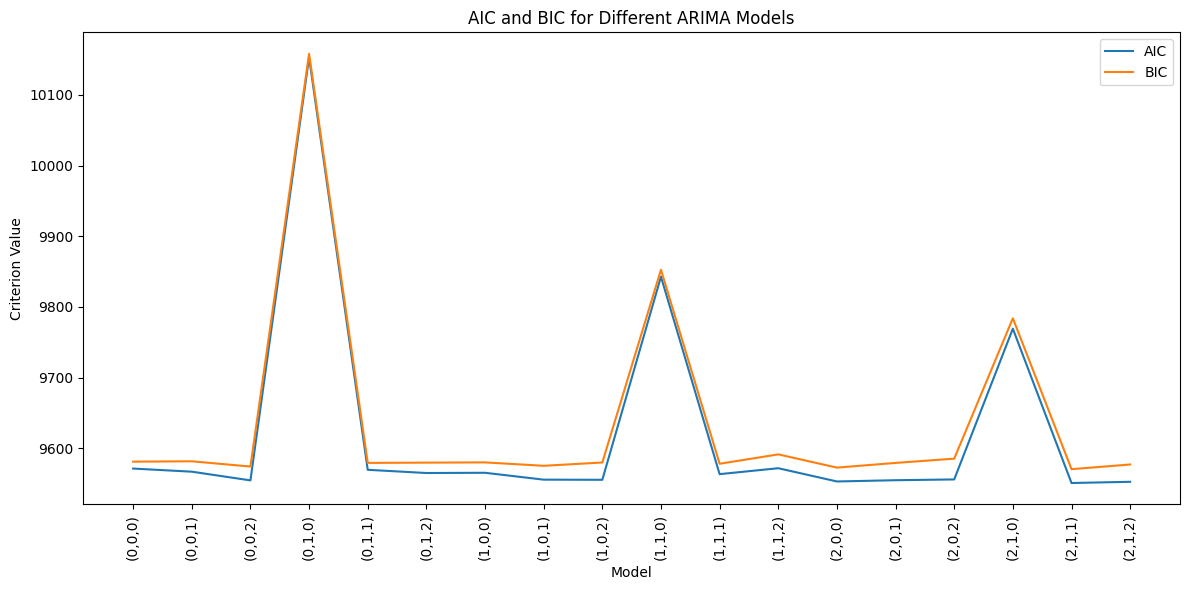

Best model according to AIC: ARIMA(2, 1, 1) with AIC = 9550.865039531815
Best model according to BIC: ARIMA(2, 1, 1) with BIC = 9570.45585930433


In [24]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Re-create the simulated sensor data
def simulate_sensor_data(num_points=1000, min_val=0, max_val=100, missing_pct=0.01, noisy_pct=0.01, faulty_pct=0.02):
    data = np.random.uniform(min_val, max_val, num_points)
    missing_indices = np.random.choice(num_points, int(num_points * missing_pct), replace=False)
    data[missing_indices] = np.nan
    noisy_indices = np.random.choice(num_points, int(num_points * noisy_pct), replace=False)
    data[noisy_indices] = np.random.uniform(min_val - 50, max_val + 50, len(noisy_indices))
    faulty_start = int(num_points * (1 - faulty_pct) / 2)
    faulty_end = int(num_points * (1 + faulty_pct) / 2)
    data[faulty_start:faulty_end] = np.random.uniform(min_val, (max_val-min_val)/10 , faulty_end-faulty_start)
    return data

# Generate the simulated data
simulated_data = simulate_sensor_data()

# Remove NaN values
simulated_data = simulated_data[~np.isnan(simulated_data)]

# Function to calculate AIC and BIC for ARIMA models
def evaluate_arima_model(data, order):
    model = ARIMA(data, order=order)
    results = model.fit()
    return results.aic, results.bic

# Test different ARIMA models
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

results = []

for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                aic, bic = evaluate_arima_model(simulated_data, (p,d,q))
                results.append(((p,d,q), aic, bic))
                print(f'ARIMA({p},{d},{q}) - AIC: {aic}, BIC: {bic}')
            except:
                continue

# Convert results to a DataFrame
df_results = pd.DataFrame(results, columns=['order', 'AIC', 'BIC'])
df_results[['p', 'd', 'q']] = pd.DataFrame(df_results['order'].tolist(), index=df_results.index)

# Plot AIC and BIC
plt.figure(figsize=(12, 6))
plt.plot(range(len(df_results)), df_results['AIC'], label='AIC')
plt.plot(range(len(df_results)), df_results['BIC'], label='BIC')
plt.xlabel('Model')
plt.ylabel('Criterion Value')
plt.title('AIC and BIC for Different ARIMA Models')
plt.legend()
plt.xticks(range(len(df_results)), [f'({p},{d},{q})' for p,d,q in df_results['order']], rotation=90)
plt.tight_layout()
plt.show()

# Find the best models according to AIC and BIC
best_aic = df_results.loc[df_results['AIC'].idxmin()]
best_bic = df_results.loc[df_results['BIC'].idxmin()]

print(f"Best model according to AIC: ARIMA{best_aic['order']} with AIC = {best_aic['AIC']}")
print(f"Best model according to BIC: ARIMA{best_bic['order']} with BIC = {best_bic['BIC']}")

## Interpreting the Results

1.  The plot shows AIC and BIC values for different ARIMA models.

2.  Lower values indicate better models.

3.  The model with the lowest AIC may differ from the model with the lowest BIC.

4.  BIC tends to penalize model complexity more heavily, especially for larger sample sizes.

When interpreting the results:

-   Look for the lowest points on the AIC and BIC curves.

-   Consider both AIC and BIC, as they may suggest different optimal models.

-   If AIC and BIC disagree, consider your specific needs:

    -   AIC may be preferred for prediction tasks.

    -   BIC may be preferred for explanation tasks or when seeking a simpler model.

#### Limitations

1.  Simplistic complexity penalization: Both AIC and BIC penalize model complexity based solely on the number of parameters, which may not accurately reflect the true complexity of a model [1](https://www.cs.princeton.edu/courses/archive/fall18/cos324/files/model-selection.pdf).
This can be problematic for models where the effective number of parameters is not easily determined.

2.  Asymptotic assumptions: AIC and BIC are based on asymptotic theory, assuming large sample sizes. They may not perform well with small datasets [2](https://stats.stackexchange.com/questions/591337/aic-when-not-to-use-it). AIC, in particular, has been reported to perform poorly for small numbers of data points.

3.  Model set limitations: These criteria assume that the true model is within the set of models being compared. If the true model is not included, the results may be misleading [2](https://stats.stackexchange.com/questions/591337/aic-when-not-to-use-it).

4.  Lack of uncertainty consideration: AIC and BIC do not take into account the uncertainty of the model [3](https://www.machinelearningmastery.com/probabilistic-model-selection-measures/). They provide point estimates rather than full posterior distributions over models.

5.  Consistency issues: In the large-data limit, AIC tends to select more complicated models than BIC and is not necessarily asymptotically consistent if the true model is in the set [2](https://stats.stackexchange.com/questions/591337/aic-when-not-to-use-it).

6.  Assumptions about data generation: Both criteria assume that the data are actually generated by the model being evaluated, which may not always be true in real-world scenarios [4](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html).

7.  Breakdown in high-dimensional settings: These models tend to break down when the problem is badly conditioned, such as when there are more features than samples [4](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html).

8.  Limited applicability: In some cases, such as with non-nested models or when comparing models with different likelihood functions, AIC and BIC may not be appropriate  [1](https://www.cs.princeton.edu/courses/archive/fall18/cos324/files/model-selection.pdf).

9.  Sensitivity to heterogeneity: The performance of AIC and BIC can vary depending on the level of unobserved heterogeneity in the data [6](https://www.researchgate.net/publication/303954547_The_relative_performance_of_AIC_AIC_C_and_BIC_in_the_presence_of_unobserved_heterogeneity).

Given these limitations, it’s often recommended to use multiple model selection criteria, cross-validation, or more sophisticated methods like the variational Free Energy for hyperparameter tuning, especially in complex modeling scenarios [3](https://pmc.ncbi.nlm.nih.gov/articles/PMC3200437/).


## Random Walks

## Definition of Random Walk

A Random Walk is a mathematical object that describes a path consisting of a succession of random steps. <br> In the context of time series, it refers to a time series where the change from one period to the next is random.

## Types of Random Walks

1.  **Simple Random Walk**: Each step is independent and can be either up or down with equal probability.

2.  **Random Walk with Drift**: Similar to a simple random walk, but with an added constant term (drift) that biases the walk in a particular direction.

## Mathematical Formulation

## Simple Random Walk

For a simple random walk, we can define it as:

$X_t=X_{t-1}+\epsilon_t$

Where:

-   $X\_t$ is the value at time t

-   $\\epsilon\_t$ is a random variable (often assumed to be normally distributed with mean 0 and constant variance)

## Random Walk with Drift

For a random walk with drift, we add a constant term:

$X_t=\delta +X_{t-1}+\epsilon_t$

Where $\\delta$ is the drift parameter.

## Relationship with Time Series Analysis

Random Walks are crucial in time series analysis for several reasons:

1.  **Non-stationarity**: Random walks are non-stationary processes, meaning their statistical properties change over time. This is important because many time series models assume stationarity.

2.  **Unit Root Tests**: Tests for random walks (like the Augmented Dickey-Fuller test) are used to determine if a time series is stationary or needs differencing.

3.  **Financial Applications**: The concept of random walks is fundamental to the Efficient Market Hypothesis in finance.

4.  **Forecasting Challenges**: Random walks are notoriously difficult to forecast, as the best prediction for any future value is simply the current value (for a simple random walk).

## Example in Python

Let’s create an example of both types of random walks and visualize
them:


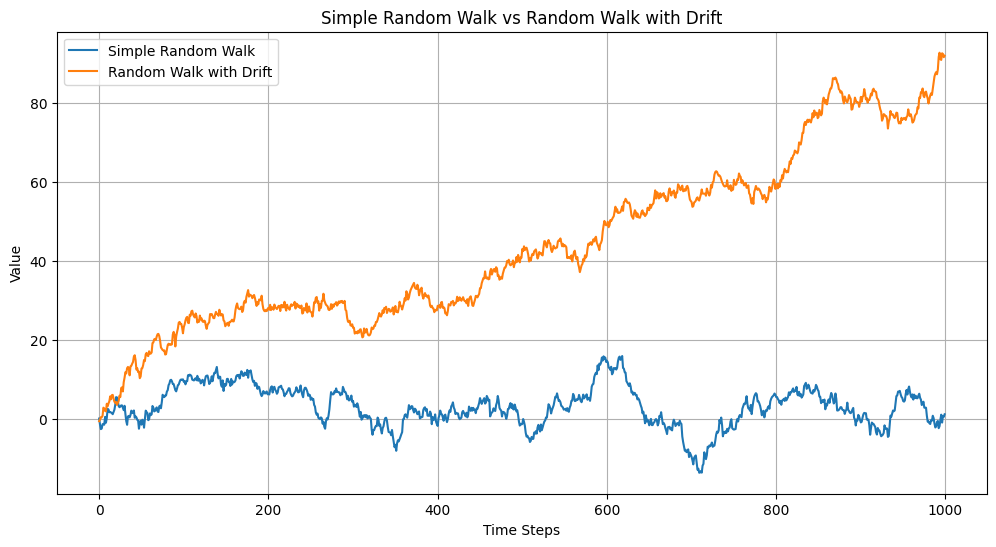

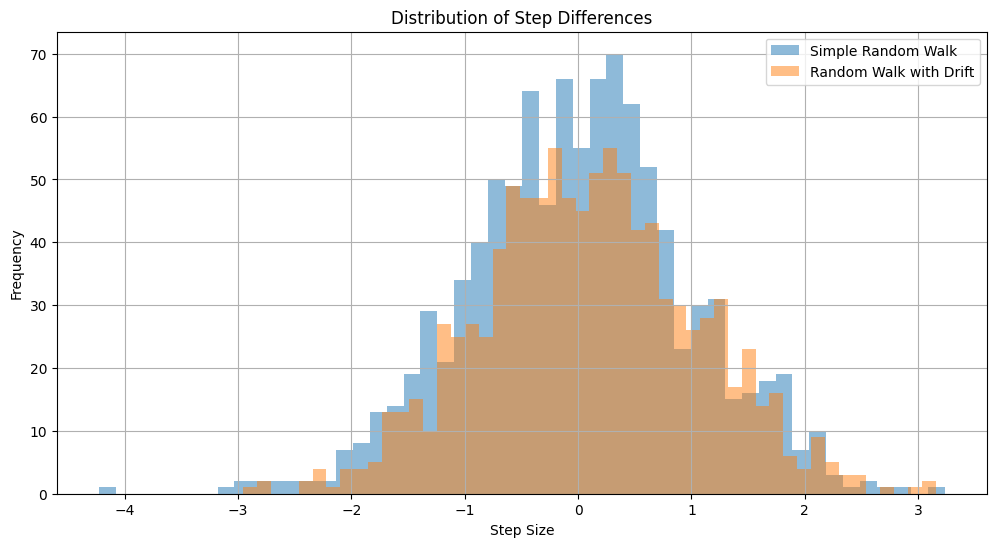

Simple Random Walk - Mean: 0.0011, Std Dev: 0.9848
Random Walk with Drift - Mean: 0.0926, Std Dev: 0.9571


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simple_random_walk(steps, start=0):
    return start + np.cumsum(np.random.normal(0, 1, steps))

def random_walk_with_drift(steps, drift, start=0):
    return start + np.cumsum(np.random.normal(drift, 1, steps))

# Generate random walks
steps = 1000
simple_walk = simple_random_walk(steps)
drift_walk = random_walk_with_drift(steps, drift=0.1)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(simple_walk, label='Simple Random Walk')
plt.plot(drift_walk, label='Random Walk with Drift')
plt.title('Simple Random Walk vs Random Walk with Drift')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and plot the differences
simple_diff = np.diff(simple_walk)
drift_diff = np.diff(drift_walk)

plt.figure(figsize=(12, 6))
plt.hist(simple_diff, bins=50, alpha=0.5, label='Simple Random Walk')
plt.hist(drift_diff, bins=50, alpha=0.5, label='Random Walk with Drift')
plt.title('Distribution of Step Differences')
plt.xlabel('Step Size')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Print some statistics
print(f"Simple Random Walk - Mean: {np.mean(simple_diff):.4f}, Std Dev: {np.std(simple_diff):.4f}")
print(f"Random Walk with Drift - Mean: {np.mean(drift_diff):.4f}, Std Dev: {np.std(drift_diff):.4f}")



## Interpretation of Results

1.  The simple random walk will tend to wander around the starting point, while the random walk with drift will show a general trend in the direction of the drift.

2.  The distribution of step differences for both walks should be approximately normal, with the random walk with drift having a mean close to the drift value.

3.  The standard deviation of the step differences should be similar forboth walks.

Random walks are fundamental in understanding many real-world phenomena, especially in financial markets and economic indicators. They highlight the challenges in predicting future values based solely on past observations and underscore the importance of considering the underlying process generating the data in time series analysis.

### Relationship between Random Walks and Time Series Analysis

## 1. Non-Stationarity

Random walks are non-stationary processes, which means their statistical properties (like mean and variance) change over time. This is crucial in time series analysis because:

-   Many time series models (like ARIMA) assume stationarity.

-   Identifying and dealing with non-stationarity is a key step in timeseries analysis.

-   Techniques like differencing are often used to transform non-stationary series (like random walks) into stationary ones.

## 2. Unit Root Tests

Tests for random walks, such as the Augmented Dickey-Fuller (ADF) test,
are essential in time series analysis:

-   They help determine if a series is stationary or contains a unit root (indicative of a random walk).

-   The presence of a unit root suggests the need for differencing to achieve stationarity.

## 3. Forecasting Challenges

Random walks present unique challenges in forecasting:

-   For a simple random walk, the best forecast for any future value is the current value.

-   This property underlies the “Efficient Market Hypothesis” in finance, suggesting that future stock prices can’t be predicted from past prices.

## 4. Model Selection

Understanding if a series behaves like a random walk influences model selection:

-   If a series is a random walk, models like ARIMA(0,1,0) might be appropriate.

-   For series with drift, ARIMA(0,1,0) with a constant term might be suitable.

## 5. Long-Term Behavior

Random walks have specific long-term properties that affect time series analysis:

-   The variance of a random walk increases with time, which impacts long-term forecasting.

-   This property is related to the concept of “long memory” in time series.

## 6. Cointegration

In multivariate time series analysis, the concept of cointegration is closely related to random walks:

-   Two or more non-stationary series that are random walks might have a stationary linear combination.

-   This is crucial in analyzing relationships between economic variables.

Let’s demonstrate some of these concepts with a Python example:


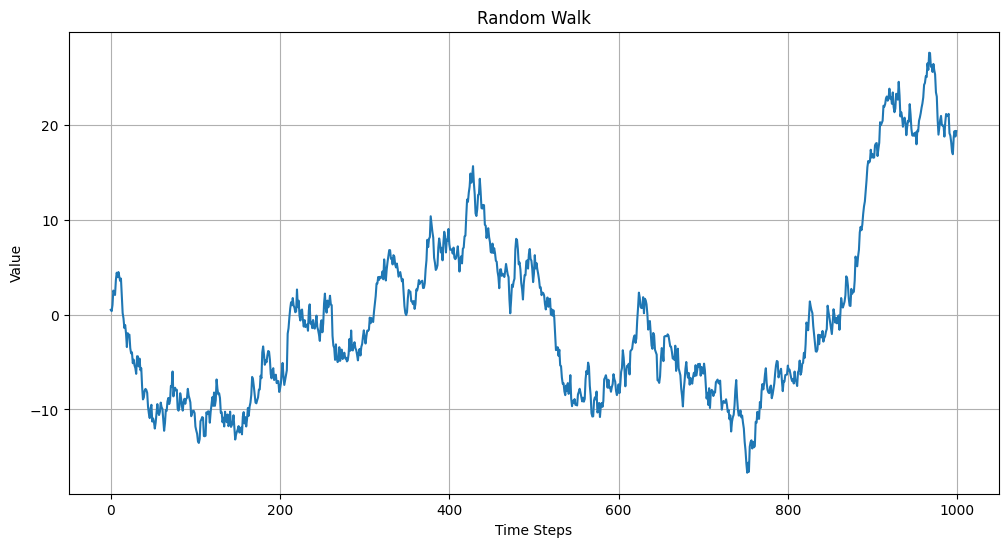

ADF Statistic: -0.9659524876918764
p-value: 0.7654789696692577


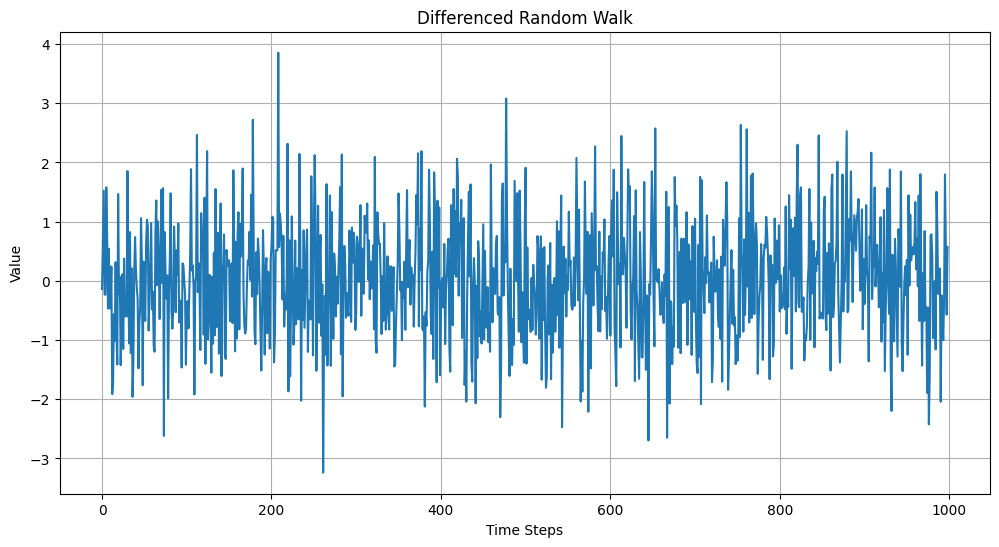

ADF Statistic (differenced): -31.789310857560594
p-value (differenced): 0.0
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1396.604
Date:                Wed, 19 Feb 2025   AIC                           2795.207
Time:                        18:08:11   BIC                           2800.114
Sample:                             0   HQIC                          2797.072
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.9590      0.042     22.758      0.000       0.876       1.042
Ljung-Box (L1) (Q):                   0.05   Jarque-Ber

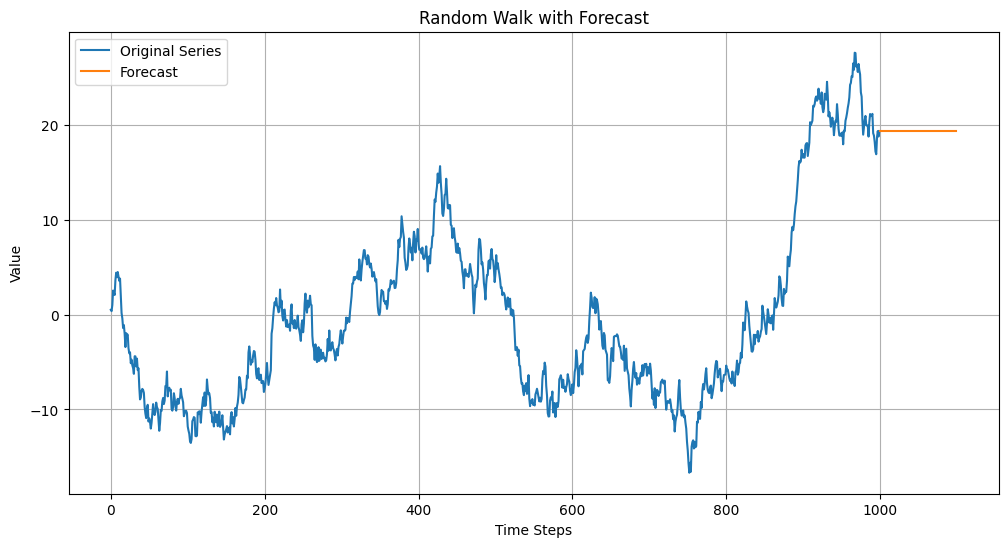

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Generate a random walk
np.random.seed(42)
steps = 1000
random_walk = np.cumsum(np.random.normal(0, 1, steps))

# Plot the random walk
plt.figure(figsize=(12, 6))
plt.plot(random_walk)
plt.title('Random Walk')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Perform ADF test
result = adfuller(random_walk)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Difference the series
diff_series = np.diff(random_walk)

# Plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(diff_series)
plt.title('Differenced Random Walk')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Perform ADF test on differenced series
result = adfuller(diff_series)
print('ADF Statistic (differenced):', result[0])
print('p-value (differenced):', result[1])

# Fit ARIMA model
model = ARIMA(random_walk, order=(0,1,0))
results = model.fit()
print(results.summary())

# Forecast
forecast = results.forecast(steps=100)
plt.figure(figsize=(12, 6))
plt.plot(random_walk, label='Original Series')
plt.plot(range(len(random_walk), len(random_walk) + 100), forecast, label='Forecast')
plt.title('Random Walk with Forecast')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()



This example demonstrates:

1.  Generation and visualization of a random walk.

2.  Use of the ADF test to check for stationarity.

3.  Differencing to transform the non-stationary random walk into a     stationary series.

4.  Fitting an ARIMA(0,1,0) model, which is appropriate for a random walk.

5.  Forecasting future values of the random walk.

Understanding the relationship between random walks and time series
analysis is crucial for proper model selection, interpretation of
results, and accurate forecasting in various fields, including
economics, finance, and scientific research.


### Random Walks and Short-term Forecasting

Random walks can be used to improve short-term forecasting in time
series data in several ways. While random walks themselves are
unpredictable by nature, understanding and incorporating their
properties can enhance forecasting models, especially for short-term
predictions. Here’s how:

1.  Baseline Model:  
    Random walks serve as an important baseline model for short-term
    forecasting. The naive forecast (using the last observed value as
    the prediction for all future values) is often based on the random
    walk model. This baseline helps in evaluating the performance of
    more complex models.

2.  Differencing:  
    Many time series exhibit random walk-like behavior. By differencing
    the data (subtracting each observation from the next), we can
    transform a non-stationary random walk into a stationary series.
    This stationary series is often easier to forecast.

3.  ARIMA Modeling:  
    Random walks are effectively modeled by ARIMA(0,1,0) processes. This
    knowledge can guide the selection of appropriate ARIMA parameters
    for short-term forecasting.

4.  Drift Component:  
    Incorporating a drift term (as in a random walk with drift) can
    capture small, consistent trends in the data, improving short-term
    forecasts.

5.  Ensemble Methods:  
    Combining random walk forecasts with other models in an ensemble can
    improve overall forecast accuracy, especially in the short term.

Let’s demonstrate some of these concepts with a Python example:

RMSE Naive: 32.0256
RMSE ARIMA: 21.5855
RMSE SES: 32.0269
RMSE Ensemble: 26.7904


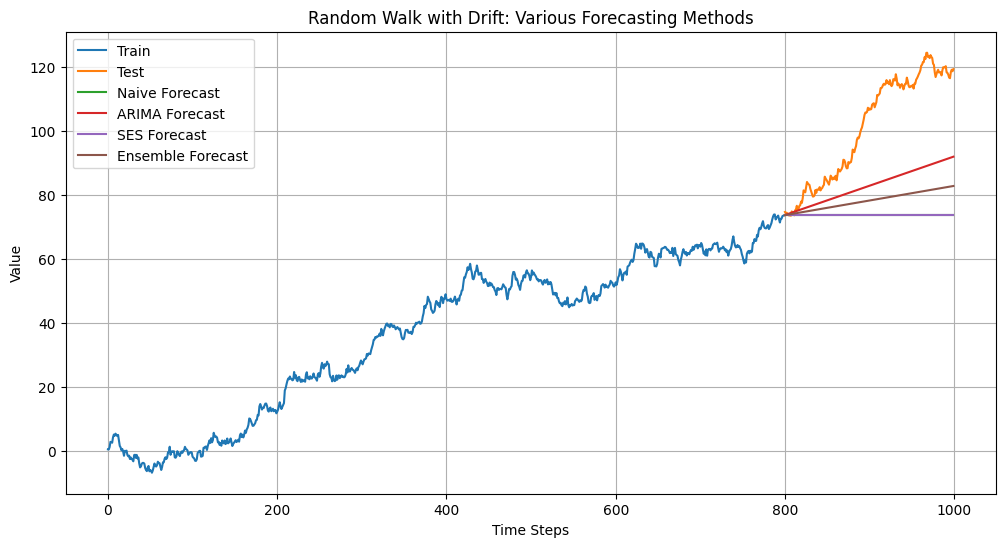

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Generate a random walk with drift
np.random.seed(42)
steps = 1000
drift = 0.1
random_walk = np.cumsum(np.random.normal(drift, 1, steps))

# Split into train and test sets
train_size = int(len(random_walk) * 0.8)
train, test = random_walk[:train_size], random_walk[train_size:]

# Naive forecast (random walk model)
naive_forecast = np.full(len(test), train[-1])

# ARIMA(0,1,0) with drift
model_arima = ARIMA(train, order=(0,1,0), trend='t')
results_arima = model_arima.fit()
forecast_arima = results_arima.forecast(steps=len(test))

# Simple exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model_ses = SimpleExpSmoothing(train).fit()
forecast_ses = model_ses.forecast(len(test))

# Ensemble forecast (average of ARIMA and SES)
forecast_ensemble = (forecast_arima + forecast_ses) / 2

# Calculate RMSE for each method
rmse_naive = sqrt(mean_squared_error(test, naive_forecast))
rmse_arima = sqrt(mean_squared_error(test, forecast_arima))
rmse_ses = sqrt(mean_squared_error(test, forecast_ses))
rmse_ensemble = sqrt(mean_squared_error(test, forecast_ensemble))

print(f'RMSE Naive: {rmse_naive:.4f}')
print(f'RMSE ARIMA: {rmse_arima:.4f}')
print(f'RMSE SES: {rmse_ses:.4f}')
print(f'RMSE Ensemble: {rmse_ensemble:.4f}')

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(range(len(train)), train, label='Train')
plt.plot(range(len(train), len(random_walk)), test, label='Test')
plt.plot(range(len(train), len(random_walk)), naive_forecast, label='Naive Forecast')
plt.plot(range(len(train), len(random_walk)), forecast_arima, label='ARIMA Forecast')
plt.plot(range(len(train), len(random_walk)), forecast_ses, label='SES Forecast')
plt.plot(range(len(train), len(random_walk)), forecast_ensemble, label='Ensemble Forecast')
plt.title('Random Walk with Drift: Various Forecasting Methods')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


This example demonstrates:

1.  Using a naive forecast based on the random walk model as a baseline.

2.  Applying an ARIMA(0,1,0) model with drift, which is suitable for
    random walks.

3.  Using Simple Exponential Smoothing as an alternative method.

4.  Creating an ensemble forecast by averaging the ARIMA and SES
    forecasts.

The results typically show that:

-   The ARIMA model with drift often performs well for short-term
    forecasts of random walk-like data.

-   The ensemble method can provide improved forecasts by combining
    different approaches.

-   Even simple methods like SES can be effective for short-term
    forecasting of random walks.

By understanding and leveraging the properties of random walks, we can
develop more effective short-term forecasting strategies for time series
data that exhibit random walk-like behavior.

**Sources:**
- Data-Preprocessing.ipynb
- [Introduction to Time Series Metrics](https://www.anodot.com/learning-center/time-series-metrics/)
- [Understanding Skewness And Kurtosis And How to Plot Them](https://www.datacamp.com/tutorial/understanding-skewness-and-kurtosis)
- [Time series outlier detection, a data-driven approach](https://www.bis.org/ifc/publ/ifcb57_07.pdf)
- [Akaike information criterion](https://en.wikipedia.org/wiki/Akaike_information_criterion)
- [Random walks (RW) - Applied Time Series
Analysis](https://atsa-es.github.io/atsa-labs/sec-tslab-random-walks-rw.html)
- [Time Series Analysis: Definition, Types & Techniques](https://www.tableau.com/analytics/what-is-time-series-analysis)
- [The Complete Guide to Skewness and Kurtosis Simplilearn.com](https://www.simplilearn.com/tutorials/statistics-tutorial/skewness-and-kurtosis)
- [A review on outlier/anomaly detection in time series data -
BIRD Home](https://bird.bcamath.org/bitstream/handle/20.500.11824/1305/A_review_on_outlier_detection_in_time_series_data__BCAM_1.pdf.pdf;jsessionid=C2FC2BA5A917804DBEFE4E4A184A52DF?sequence=1)
- [Why is AIC or BIC commonly used in model selections for time](https://stats.stackexchange.com/questions/523485/why-is-aic-or-bic-commonly-used-in-model-selections-for-time-series-forecasting)- [Random Walk Process - CFA, FRM, and Actuarial Exams Study
Notes](https://analystprep.com/study-notes/cfa-level-2/random-walk-process/)
- [Time Series Data Analysis](https://www.influxdata.com/what-is-time-series-data/)
- [Tests for Skewness, Kurtosis, and Normality for Time Series Data](http://www.columbia.edu/~jb3064/papers/2005_Testing_skewness_kurtosis_and_normality_for_time_series_data.pdf)
- [Algorithm for Online Outlier Detection in Time Series](https://www.baeldung.com/cs/time-series-online-outlier-detection)
- [Performance Evaluation of AIC and BIC in Time Series](https://www.researchgate.net/publication/338730979_Performance_Evaluation_of_AIC_and_BIC_in_Time_Series_Clustering_with_Piccolo_Method)
- [White Noise and Random Walks in Time Series Analysis](https://www.quantstart.com/articles/White-Noise-and-Random-Walks-in-Time-Series-Analysis/)
- [Understanding Basic Statistical Values](https://www.ni.com/docs/en-US/bundle/labview-advanced-signal-processing-toolkit-api-ref/page/lvasptconcepts/tsa_basic_stat_analysis.html)
- [Outlier detection in Time series](https://s-ai-f.github.io/Time-Series/outlier-detection-in-time-series.html)
- [A Gentle Introduction to the Random Walk for Times Series](https://www.machinelearningmastery.com/gentle-introduction-random-walk-times-series-forecasting-python/)
- [Quartile: Definition, Finding, and Using](https://statisticsbyjim.com/basics/quartile/)
- [Quartiles and Their Importance in Data Analysis](https://cards.algoreducation.com/en/content/F-QNSGE2/understanding-quartiles-data-analysis)
- [Quartiles - Definition, Formulas, Interquartile Range](https://byjus.com/maths/quartiles/)
- [What Are Quartiles? Statistics 101](https://articles.outlier.org/what-are-quartiles-in-statistics)
- [Calculating the range and interquartile range](https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch12/5214890-eng.htm)
- [Quartiles & Interquartile Range \| Calculation & Examples](https://study.com/learn/lesson/how-to-find-interquartile-range-quartiles.html)